# Homework 4{-}

**Due: 04/02/2020** (Thursday 2nd April at 11:59pm).

## Instructions{-}

+ In any case, develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you can either:
    
    - Type the answer using the built-in latex capabilities. In this case, simply export the notebook as a pdf and upload it on gradescope; or
    - you can print the notebook (after you are done with all the code), write your answers by hand, scan, turn your response to a single pdf, and upload on gradescope. 

## Student details{-}

+ **First Name: Parveen**
+ **Last Name: Dhillon**
+ **Email: <pdhillon@purdue.edu>**

## Readings{-}

Before attempting the homework, it is probably a good idea to:
+ Read chapter 1, 2, 4 of [Rasmussen](http://www.gaussianprocess.org/gpml/chapters/);
+ Review the lecture slides and handouts on Gaussian processes (Lec 14-17). 

# Problem 1 


## Part A 

We have seen in the lectures that Gaussian processes define a probability distribution over function spaces. We encode prior information about the underlying function space through the covariance kernel. 
For instance, the squared exponential covariance encode the prior information that the unknown function is an infinitely differentiable (i.e. smooth) function. 
The exponential function, on the other hand, encode the prior knowledge that the unknown function is continuous, but nowhere differentiable. 

Define a kernel to encode the following priors:

1. The unknown function is invariant to the order of its arguments (For instance, if the underlying function is bivariate, i.e. $\mathbf{x} = (x_1, x_2)$, then $f(x_1, x_2) = f(x_2, x_1)$) ? 

2. The unknown function is a "step" function (i.e., the function changes values only at integer inputs)?


**Solution:**
$$
f(\cdot) \sim \mbox{GP}\left(m(\cdot), k(\cdot, \cdot) \right)
$$

**1. Kernel to encode the unknown function which is invariant to the order of its arguments:**
As from the properties of Gaussian Process, to define a prior on the unknown function space which is invariant to the order of its arguments, we need to define a kernel which is invariant to the order of its arguments. If we look at a general squared exponential multivariate covariance function for $d$ dimensional input which is,

\begin{align*}
k(\mathbf{x},\mathbf{x'}) &= s^2 \exp \left( -\frac{1}{2}(\mathbf{x} - \mathbf{x'})^T \begin{bmatrix} \ell_{1}^{-2} & 0 & \dots & 0 \\ 0 & \ell_{2}^{-2} & \dots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \dots & \ell_{d}^{-2} \end{bmatrix} (\mathbf{x} - \mathbf{x'}) \right) \\
&= s^2 \exp \left( -\frac{1}{2} \sum_{i=1}^d \frac{(x_i - x_i')^2}{\ell_i^2} \right)
\end{align*}

where $s^2,\ell_i>0, i=1,\dots,d$ are parameters as follows:

+ $s^2$ is known as the *signal strength*. The bigger it is, the more the GP $f(\cdot)$ will vary about the mean.

+ $\ell_i$ is known as the *length scale* of the $i$-th input dimension of the GP which defines how the function is correlated or varies along the $i$-th dimensions.

For the kernel to be independent of the order of arguments ($x_i$'s), $\ell_i$ should be same along different input dimensions. So, squared exponential covariance function with same $\ell_i = \ell$ is independent of the order of arguments, as with the same $\ell$ the sum of the terms inside the exponential will result in same value for given $\mathbf{x}$ and $\mathbf{x}'$, independent of the order of $x_i$'s.

\begin{align*}
k(\mathbf{x},\mathbf{x'}) &= s^2 \exp \left( -\frac{1}{2}(\mathbf{x} - \mathbf{x'})^T \begin{bmatrix} \ell^{-2} & 0 & \dots & 0 \\ 0 & \ell^{-2} & \dots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \dots & \ell^{-2} \end{bmatrix} (\mathbf{x} - \mathbf{x'}) \right) \\
&= s^2 \exp \left( -\frac{1}{2} \sum_{i=1}^d \frac{(x_i - x_i')^2}{\ell^2} \right)
\end{align*}

So, Gaussian Process prior with $0$ mean (or order independent mean) and above kernel is independent of the order of arguments,
$$
f(\cdot) \sim \mbox{GP}\left(0, k(\mathbf{x}, \mathbf{x'}) \right)
$$


**2. Kernel to encode the unknown function which is a "step" function (i.e., the function changes values only at integer inputs):**

Using the property of kernel i.e. if $k(x,x')$ is a valid covariance function, then wrapping or transforming its arguments by any arbitrary function $T$ produces another valid covariance function,
$$\tilde{k}(x,x') = k(T(x),T(x′))$$

Now to have "step" function i.e. it changes values only at integer inputs, we need to define kernel which changes only at integer. For this we can define the transformation $T(x)$ as rounding off the $x$ to integer either using *floor* or *ceil* function. Here we will use *floor* function that is,
$$ T(x) = \lfloor x \rfloor \ : \mathbb{R} \to \mathbb{Z}$$
which maps a real number $x$ to the greatest integer less than or equal to $x$.

So, starting with valid covariance function $k(\mathbf{x},\mathbf{x}')$ as squared exponential function for $d$ dimensional input,
$$
k(\mathbf{x},\mathbf{x'}) = s^2 \exp \left( -\frac{1}{2} \sum_{i=1}^d \frac{(x_i - x_i')^2}{\ell_i^2} \right)
$$
Then, transforming its arguments with above $T(x)$ we get,
$$
\tilde{k}(\mathbf{x},\mathbf{x'}) = s^2 \exp \left( -\frac{1}{2} \sum_{i=1}^d \frac{\left( \lfloor x_i \rfloor- \lfloor x_i' \rfloor \right)^2}{\ell_i^2} \right)
$$
which only changes at integer arguments and stays constant between two integer thus giving the step function property to kernel. Also, the above kernel satisfies positive definite condition as it is based from a squared exponential kernel function.

## Part B 

Consider a univariate function $f:\mathbb{R} \rightarrow \mathbb{R}$. $f$ is an unknown function which you know to be twice differentiable. You can query a source of information, say $s$, which returns the function derivative at any arbitrary input, i.e., $s(x) = f'(x)$. 

a. Pose a suitable GP prior on the unknown $f$ - you can assume a zero-mean process. Does this induce a GP prior on $s$? If so, what is it's covariance kernel? 

b. Given a dataset of noisy observations, $\mathcal{D} = \{ x^{(i)}, s^{(i)} + \epsilon^{(i)} \}_{i=1}^{M}$ ($\epsilon^{(i)}$ being i.i.d. zero-mean Gaussian with unknown variance $\sigma_{n}^{2}$), what is the predictive distribution $p(f^*|x^*, \mathcal{D})$ over the unknown function $f$ given a test input $x^*$? 

**Solution:**
**a.**

$$
f(x) \sim \mbox{GP}\left(m(x), k(x, x') \right)
$$
where mean and kernel function are,
$$ m(x) = 0 \text{ (zero mean)}$$
$$ k(x, x') = v \exp \left(-\frac{1}{2} \frac{(x-x')^2}{\ell^2} \right)$$
which is infinitely differentiable, so it satisfies the twice differential condition.

Now as,
$$ s(x) = f'(x) $$
As there is Gaussian Process (GP) prior over the space of functions i.e. $f(x)\sim \mbox{GP}(0,k(x,x'))$, then the action of a linear operator on the function will also produce a GP. So the derivative operator $\mathcal{L}_x = \frac{d}{dx}(\cdot)$, which is a linear operator, on the GP $f$ will result in another GP, i.e. $s(x)=f'(x)$ is also a GP.

Now as $f$ is a GP with zero mean and kernel $k$ i.e. $f(x) \sim \mbox{GP}(0, k(x, x'))$, then $s(x)=\mathcal{L}_{x} f(x) = f'(x)$ is also a zero mean GP with kernel $\mathcal{L}_{x} \mathcal{L}_{x'} k(x,x')$ which is,

$$ s(x) \sim \mbox{GP}\left(0, \frac{\partial^2 k(x, x')}{\partial x \partial x'} \right) $$
where,

\begin{align*}
\frac{\partial^2 k(x, x')}{\partial x \partial x'} &= \frac{\partial}{\partial x'} \left( \frac{\partial k(x, x')}{\partial x} \right) \\
&= \frac{\partial}{\partial x'} \left( -\frac{v(x-x')}{\ell^2} \exp \left(-\frac{1}{2} \frac{(x-x')^2}{\ell^2} \right) \right) \\ 
& =\left( \frac{v}{\ell^2} \exp \left(-\frac{1}{2} \frac{(x-x')^2}{\ell^2} \right) -\frac{v(x-x')^2}{\ell^4} \exp \left(-\frac{1}{2} \frac{(x-x')^2}{\ell^2} \right) \right) \\
&= \frac{v}{\ell^2} \left(1 - \frac{(x-x')^2}{\ell^2} \right) \exp \left(-\frac{1}{2} \frac{(x-x')^2}{\ell^2} \right) 
\end{align*}

So the covariance kernel of $s(x)$ is,
$$
k_s(x,x') = \frac{v}{\ell^2} \left(1 - \frac{(x-x')^2}{\ell^2} \right) \exp \left(-\frac{1}{2} \frac{(x-x')^2}{\ell^2} \right) 
$$

**b.**

For the function $f$ with GP prior as,
$$ f(x) \sim \mbox{GP}(0,k(x,x') )$$
Then the derivative of $f$ i.e $s(x) = f'(x)$ is also a GP as described above,
$$ s(x) \sim \mbox{GP}(0,k_s(x,x') )$$
where covariance and cross-covariance kernel functions (Rasmussen & Williams, 2006) are as,

\begin{gather*}
cov\left(f(x),f(x')\right) = k(x,x') \\
cov\left(s(x),s(x')\right) = k_s(x,x') = \frac{\partial^2 k(x, x')}{\partial x \partial x'} \\
cov\left(f(x),s(x')\right) = k_c(x,x') = \frac{\partial k(x, x')}{\partial x' }
\end{gather*}

Now, given a dataset of noisy observations, $\mathcal{D} = \{ x^{(i)}, s^{(i)} + \epsilon^{(i)} \}_{i=1}^{M}$ ($\epsilon^{(i)}$ being i.i.d. zero-mean Gaussian with unknown variance $\sigma_{n}^{2}$), we need to find the predictive distribution $p(f^*|x^*, \mathcal{D})$ over the unknown function $f$ given a test input $x^*$.

As noisy measurements/observations are,
$$ y = s(x) + \epsilon$$
where $\epsilon \sim \mathcal{N}\left(\epsilon|0,\sigma_n^2 \right)$ i.i.d. zero-mean Gaussian

So, we have the Gaussian likelihood on derivative measurements as,
$$ \mathbf{y|s(x)} \sim \mathcal{N}\left(\mathbf{y|s(x)},\sigma_n^2 \mathbf{I} \right) $$

From this, the prior on noisy measurement (Rasmussen & Williams, 2006) becomes,

\begin{gather*}
cov(y,y') = k_s(x,x') + \sigma_n^2 \delta (x-x') \ \{\delta (x-x') = 1 \iff x=x', \text{ else } 0\} \\
cov(\mathbf{y}) = \mathbf{K_s(x,x)} + \sigma_n^2 \mathbf{I}
\end{gather*}

where $\mathbf{K_s(x,x)}$ expression is given below.

As, we have $m$ observations points:
$$ \mathbf{x}_{1:m} = \left(x_1,\dots,x_{m}\right)$$
$$ \mathbf{y}_{1:m} = \left(y(x_1),\dots,y(x_{m})\right)$$

Now, let's take $n^*$  arbitrary collection of test points:
$$
\mathbf{x}^*_{1:n^*} = \left(x^*_1,\dots,x^*_{n^*}\right).
$$
Consider the vector of function values at these test points:
$$
\mathbf{f}^*_{1:n^*} = \left(f(x_1^*),\dots,f(x^*_{n^*})\right).
$$

From the definition of the GP (Rasmussen & Williams, 2006), we can now write the joint probability density of $\mathbf{y}$ and $\mathbf{f}^*$. It is just a multivariate Gaussian. So, we have:
$$
p(\mathbf{y}_{1:m}, \mathbf{f}^*_{1:n^*} | \mathbf{x}_{1:m},\mathbf{x}^*_{1:n^*}) 
=  \mathcal{N} \left(\begin{pmatrix} \mathbf{y}_{1:m} \\ \mathbf{f}^*_{1:n^*} \end{pmatrix} \middle | 
\begin{pmatrix} \mathbf{0} \\ \mathbf{0} \end{pmatrix},
\begin{pmatrix} \mathbf{K_s}(\mathbf{x}_{1:m}, \mathbf{x}_{1:m})+\sigma_n^2 \mathbf{I}_m & \mathbf{K_c^T}(\mathbf{x}^*_{1:n^*},\mathbf{x}_{1:m}) \\
\mathbf{K_c}(\mathbf{x}^*_{1:n^*},\mathbf{x}_{1:m}) & \mathbf{K}(\mathbf{x}^*_{1:n^*}, \mathbf{x}^*_{1:n^*}) \end{pmatrix} \right)
$$
where covariance and cross-covariance matrix are,

\begin{gather*}
\mathbf{K_s}(i,j) = k_s(x_i,x_j) = \frac{\partial^2 k(x_i, x_j)}{\partial x_i \partial x_j} \ \{i,j \in (1,2,\dots,m) \} \\
\mathbf{K_c}(i,j) = k_c(x_i^*,x_j) = \frac{\partial k(x_i^*, x_j)}{\partial x_j} \ \{i \in (1,2,\dots,n^*); j \in (1,2,\dots,m) \} \\
 \mathbf{K}(i,j) = k(x_i^*,x_j^*) \ \{i,j \in (1,2,\dots,n^*) \}
\end{gather*}

Now, from the joint Gaussian distribution of $\mathbf{y}$ and $\mathbf{f}^*$, based on the conditional distribution of a partitioned Gaussians from equation 2.81 and 2.82 (Bishop, 2006) or equation 2.22 to 2.24 (Rasmussen & Williams, 2006), we get the conditional distribution of $\mathbf{f}^*$ on $\mathbf{y}$ as,

$$
p(\mathbf{f}^*_{1:n^*}| \mathbf{x}^*_{1:n^*}, \mathcal{D}) = \mathcal{N}\left(\mathbf{f}^*_{1:n^*} \middle| \mathbf{m}_n(\mathbf{x}^*_{1:n^*}), \mathbf{K}_n(\mathbf{x}^*_{1:n^*},\mathbf{x}^*_{1:n^*})\right),
$$
where *posterior mean* is:
$$
\mathbf{m}_n(\mathbf{x}^*_{1:n^*}) = \mathbf{0} +\mathbf{K_c}(\mathbf{x}^*_{1:n^*},\mathbf{x}_{1:m}) \left[\mathbf{K_s}(\mathbf{x}_{1:m},\mathbf{x}_{1:m})+\sigma_n^2 \mathbf{I}_m \right]^{-1} \left(\mathbf{y}_{1:m} \right),
$$
and the *posterior covariance matrix* is:
$$
\mathbf{K}_n(\mathbf{x}^*_{1:n^*},\mathbf{x}^*_{1:n^*}) =  \mathbf{K}(\mathbf{x}^*_{1:n^*},\mathbf{x}^*_{1:n^*}) - \mathbf{K_c}(\mathbf{x}^*_{1:n^*},\mathbf{x}_{1:m}) \left[\mathbf{K_s}(\mathbf{x}_{1:m},\mathbf{x}_{1:m})+\sigma_n^2 \mathbf{I}_m \right]^{-1} \mathbf{K_c^T}(\mathbf{x}^*_{1:n^*},\mathbf{x}_{1:m}),
$$

Now as the test points $\mathbf{x}^*_{1:n^*}$ are arbitrary and that the joint distribution of the function values at these points, $\mathbf{f}^*$, conditioned on the observations $\mathcal{D}$ is a multivariate Gaussian with a mean and covariance matrix which can be specified by the posterior mean and covariance functions as shown below, respectively. This is the definition of a Gaussian process. Therefore, the posterior probability measure over the space of functions is also a Gaussian process:

$$
f(x)|\mathcal{D} \sim \operatorname{GP}(m_n(x), k_n(x, x'))
$$
where *posterior mean function* is:
$$
m_n(x) = 0 + \mathbf{k_c}(x,\mathbf{x}_{1:m})\left[\mathbf{K_s}(\mathbf{x}_{1:m},\mathbf{x}_{1:m})+\sigma_n^2 \mathbf{I}_m \right]^{-1} \left(\mathbf{y}_{1:m} \right),
$$
and the *posterior covariance function* is:
$$
k_n(x, x') = k(x,x') - \mathbf{k_c}(x,\mathbf{x}_{1:m})\left[\mathbf{K_s}(\mathbf{x}_{1:m},\mathbf{x}_{1:m})+\sigma_n^2 \mathbf{I}_m \right]^{-1} \mathbf{k_c}^T(x,\mathbf{x}_{1:m}),
$$
with
$$
\mathbf{k_c}(x,\mathbf{x}_{1:m}) = \left(k_c(x,x_1),\dots,k_c(x,x_m)\right) = \left(\frac{\partial k(x, x_1)}{\partial x_1},\dots,\frac{\partial k(x, x_m)}{\partial x_m } \right)
$$
being the cross-covariance vector.

Now, looking only at a single point $x^*$ i.e. only one test point, we get the point predictive distibution of $f(x^*)$ as,
$$
p\left(f(x^*) | \mathcal{D}\right) = \mathcal{N}\left(f(x^*)\middle| m_n(x^*), \sigma_n^2(x^*)\right),
$$
where the *predictive mean* and *variance* are:

\begin{gather*}
m_n(x^*) = \mathbf{k_c}(x^*,\mathbf{x}_{1:m})\left[\mathbf{K_s}(\mathbf{x}_{1:m},\mathbf{x}_{1:m})+\sigma_n^2 \mathbf{I}_m \right]^{-1} \left(\mathbf{y}_{1:m} \right) \\
\sigma_n^2(\mathbf{x}^*) = k_n(x^*,x^*) = k(x^*,x^*) - \mathbf{k_c}(x^*,\mathbf{x}_{1:m})\left[\mathbf{K_s}(\mathbf{x}_{1:m},\mathbf{x}_{1:m})+\sigma_n^2 \mathbf{I}_m \right]^{-1} \mathbf{k_c}^T(x^*,\mathbf{x}_{1:m})
\end{gather*}

where

\begin{align*}
k(x^*,x^*) & \text{ : covariance kernel function of } f(x)  \\
\mathbf{k_c}(x^*,\mathbf{x}_{1:m}) & \text{ : cross-covariance vector between the test function observation and training derivative observations} \\
\mathbf{k_c}(x^*,\mathbf{x}_{1:m}) &= \left(\frac{\partial k(x^*, x_1)}{\partial x_1},\dots,\frac{\partial k(x^*, x_m)}{\partial x_m } \right) \\
\mathbf{K_s}(\mathbf{x}_{1:m},\mathbf{x}_{1:m}) & \text{ :  covariance matrix applying the kernel function of s(x) to the training inputs} \\
\mathbf{K_s}(i,j) & = k_s(x_i,x_j) = \frac{\partial^2 k(x_i, x_j)}{\partial x_i \partial x_j} \ \{i,j \in (1,2,\dots,m) \} \\
\sigma_n^2 & \text{ : derivative observation unknown measurement noise variance} \\
\mathbf{y}_{1:m} & \text{ : observed derivative noisy measurements} \\
\mathbf{x}_{1:m} & \text{ : observed inputs}
\end{align*}

# Problem 2 - The Mauna Loa CO$_2$ data set

The National Oceanic and Atmospheric Administration (NOAA) has been measuring the levels of atmospheric CO2 at the Mauna Loa, Hawaii. The measurements start on March 1958 and go all the way to Janurary 2016.
The data can be found [here](http://www.esrl.noaa.gov/gmd/ccgg/trends/data.html).
The Python script below, downloads and plots the data set.

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
try:
  import GPy
except:
  _=!pip install GPy
  import GPy
%matplotlib inline
from sklearn.linear_model import ARDRegression, LinearRegression
np.set_printoptions(suppress=True)
import scipy
import warnings
warnings.filterwarnings('ignore')
import pickle
try:
  import wget
except:
  _=!pip install wget
  import wget

In [2]:
# download data
data_url = 'https://raw.githubusercontent.com/PredictiveScienceLab/uq-course/master/homeworks/mauna_loa_co2.txt'
fname = "mauna_loa_co2.txt"
if not os.path.exists(fname):
    wget.download(data_url, fname)
data = np.loadtxt(fname,dtype=np.float64)

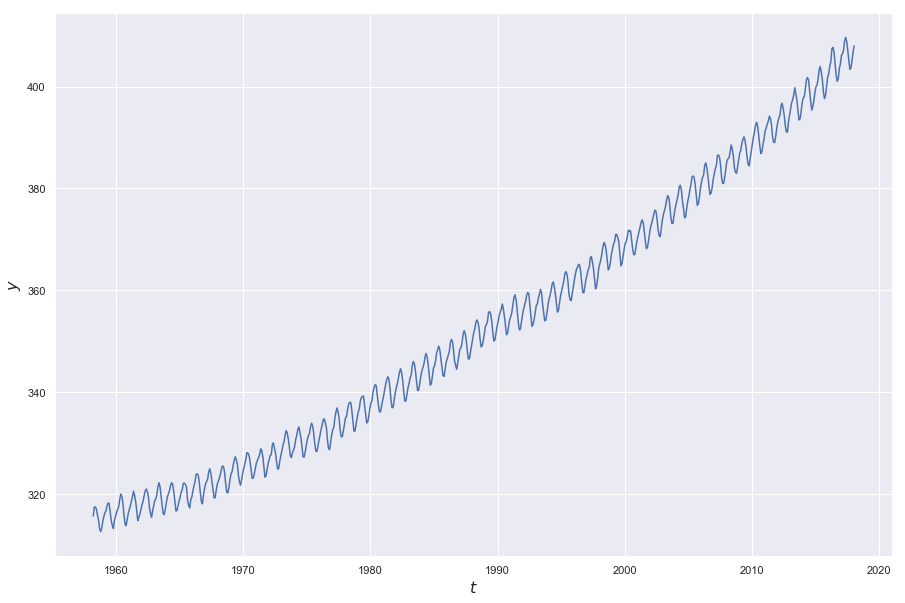

In [3]:
#load data 
t = data[:, 2][:, None]  #time (in decimal dates)
y = data[:, 4][:, None]  #CO2 level (mole fraction in dry air, micromol/mol, abbreviated as ppm)
fig, ax = plt.subplots(1, figsize = (15, 10))
ax.plot(t, y)
ax.set_xlabel('$t$', fontsize = 16)
ax.set_ylabel('$y$', fontsize = 16);

In [4]:
# We need a generic function that computes the design matrix
def compute_design_matrix(X, phi):
    """
    Arguments:
    
    X   -  The observed inputs (1D array)
    phi -  The basis functions.
    """
    num_observations = X.shape[0]
    num_basis = phi.num_basis
    Phi = np.ndarray((num_observations, num_basis))
    for i in range(num_observations):
        Phi[i, :] = phi(X[i, :])
    return Phi

Overall, we observe a steady growth of CO2 levels. The wiggles correspond to seasonal changes. Since the vast majority of the population inhabits the Northen hemisphere, fuel consumption goes up during the Northen winters. Our goal is to study this data set with the regression techniques we learned in class. Specifically we would like to provide an answer to the following task.
+ **Task 1** Predict the evolution of the CO2 levels from Feb 2018 to Feb 2028.
+ **Task 2**  Quantify our uncertainty about this prediction.

## Part  A 

Use any Bayesian linear regression technique discussed in class to construct a map between $t$ and $y$. State clearly which basis functions you use and why. We suggest you use automatic relevance determination (ARD) as implemented in [scikitlearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ARDRegression.html).

The choice of the candidate basis functions is completely up to you. We expect you to justify your choices and interpret your findings. E.g., "I picked these basis functions because I expected this to happen", or "ARD finally selected these basis functions and this can be interpreted as this and that." 

**Solution:**

As we can see from the above plot that there are two trends in data, one, an overall rising trend with some fluctuations in general rising trend, and second, a short term periodic seasonal variation trend.
The overall trend can possibly be explained with polynomial and exponential basis functions, and the seasonal periodic variation can be explained with periodic functions such as sines and cosines. 

Accordingly we will chose polynomial basis functions in addition to exponential basis function to capture the overall rising trend with some medium fluctuations, and Fourier series basis function with period of 1 year to capture seasonal variations. So, we have overall basis function formulations as,
$$
\phi(x) = {\begin{bmatrix}1 & x & \dots & x^{n_{p}} & \exp(p x) & \sin(2\pi x) & \cos(2\pi x) & \dots & \cos(2 n_f \pi x)\end{bmatrix}}^T
$$

where,

\begin{align*}
n_p & \text{ : order of polynomial basis functions} \\
p   & \text{ : parameter of exponential basis function} \\
n_f & \text{ : number of terms of Fourier basis functions}
\end{align*}

Now, we can get some rough idea about the initial value of $p$ in exponential term from the overall general variation in the data as,
$$ p \approx \frac{\log(y_{max}/y_{min})}{(t_{max}-t_{min})} $$
Order of the polynomial basis functions and number of terms in the Fourier basis functions were decided with starting from reasonable initial value of 3 and 2 respectively, and then iterating over the regression analysis. The final selected parameters are as,
$$ n_p = 2; \ n_f = 4; \ p = 0.0045 $$

In [5]:
p = np.log(y.max()/y.min())/(t.max()-t.min())
print('p : ',p)

p :  0.004515606485253303


Now, with the above basis, we will setup and solve this Bayesian linear regression problem with Automatic Relevance Determination to estimate the model parameters and model prediction with uncertainties.

In [6]:
class PolynomialBasis(object):
    """
    A set of linear basis functions.
    
    Arguments:
    degree  -  The degree of the polynomial.
    """
    def __init__(self, degree):
        self.degree = degree
        self.num_basis = degree + 1
    def __call__(self, x):
        return np.array([x[0] ** i for i in range(self.degree + 1)])

class FourierBasis(object):
    """
    A set of linear basis functions.
    
    Arguments:
    num_terms  -  The number of Fourier terms.
    L          -  The period of the function.
    """
    def __init__(self, num_terms, L):
        self.num_terms = num_terms
        self.L = L
        self.num_basis = 2 * num_terms
    def __call__(self, x):
        res = np.ndarray((self.num_basis,))
        for i in range(num_terms):
            res[2 * i] = np.cos(2 * (i+1) * np.pi / self.L * x[0])
            res[2 * i + 1] = np.sin(2 * (i+1) * np.pi / self.L * x[0])
        return res

class ExpBasisFunctions(object):
    """
    A set of linear basis functions.
    
    Arguments:
    p -  The assumed exponential coefficient.
    """
    def __init__(self, p):
        self.ell = p
        self.num_basis = 1
    def __call__(self, x):
        return np.array([np.exp(p * x[0])])

In [7]:
# Tranform Data: Change the start time to 0 for regression
X = t - t.min()
Y = y

In [8]:
# Design Matrix
degree = 2
phi_p = PolynomialBasis(degree)
Phi_p = compute_design_matrix(X, phi_p)
p = 0.0045
phi_e = ExpBasisFunctions(p)
Phi_e = compute_design_matrix(X, phi_e)
num_terms = 4
L = 1.
phi_f = FourierBasis(num_terms, L)
Phi_f = compute_design_matrix(X, phi_f)
Phi = np.hstack([Phi_p,Phi_e,Phi_f])

In [9]:
# Automatic Relevance Determination Regression
regressor = ARDRegression()
regressor.fit(Phi, Y.flatten())
# Hyperparameters Estimated Values
sigma = np.sqrt(1. / regressor.alpha_)
print('best sigma:', sigma)
alpha = regressor.lambda_
print('best alpha:', alpha)
A = np.dot(Phi.T, Phi) / sigma ** 2. + alpha * np.eye(Phi.shape[1])
L = scipy.linalg.cho_factor(A)
m = scipy.linalg.cho_solve(L, np.dot(Phi.T, Y) / sigma ** 2)  # The posterior mean of w
S = scipy.linalg.cho_solve(L, np.eye(Phi.shape[1]))           # The posterior covariance of w

best sigma: 0.7600942317917134
best alpha: [    1.           946.47764317  8884.7554085      0.00003193
     0.19265486     0.36118371     1.61444487  5282.33105571
 12254.33808194   161.42355845   303.54473076 17699.85351427]


From above ARD regression estimated precisions of the weights (alpha) of the regression basis functions, we can see that the ARD mainly focuses or selects (with smaller precision values) basis functions which are the constant term in polynomial basis function, exponential term that are able to capture the main components of general rising trend in data. This seems reasonable as we can see that the general rising trend can be explained with exponential term plus a constant term for translating $y$ value linearly. And, for seasonal variations ARD selects first three terms in the Fourier basis functions $\begin{pmatrix} \cos(2\pi x) & \sin(2\pi x) & \cos(4\pi x)\end{pmatrix}$. This shows that the multiple sines and cosines terms are used capture the periodic variation pattern which is not a perfect sinusoidal variation.

In [10]:
# Posterior predictive distribution.
X_p = np.linspace(0 ,np.max(X) + 10, 1000)[:, None]
Phi_p = np.hstack([compute_design_matrix(X_p, phi_p),compute_design_matrix(X_p, phi_e),compute_design_matrix(X_p, phi_f)])
Y_p = np.dot(Phi_p, m).flatten() # The mean prediction
V_p_ep = np.einsum('ij,jk,ik->i', Phi_p, S, Phi_p) # The epistemic uncertainty 
S_p_ep = np.sqrt(V_p_ep)
V_p = V_p_ep + sigma ** 2 # Full uncertainty
S_p = np.sqrt(V_p)
Y_l_ep = Y_p - 2. * S_p_ep  # Lower epistemic predictive bound
Y_u_ep = Y_p + 2. * S_p_ep  # Upper epistemic predictive bound
Y_l = Y_p - 2. * S_p # Lower predictive bound
Y_u = Y_p + 2. * S_p # Upper predictive bound

In [11]:
# Transform time back to actual start point for plotting
X_n = X + t.min()
X_p = X_p + t.min()

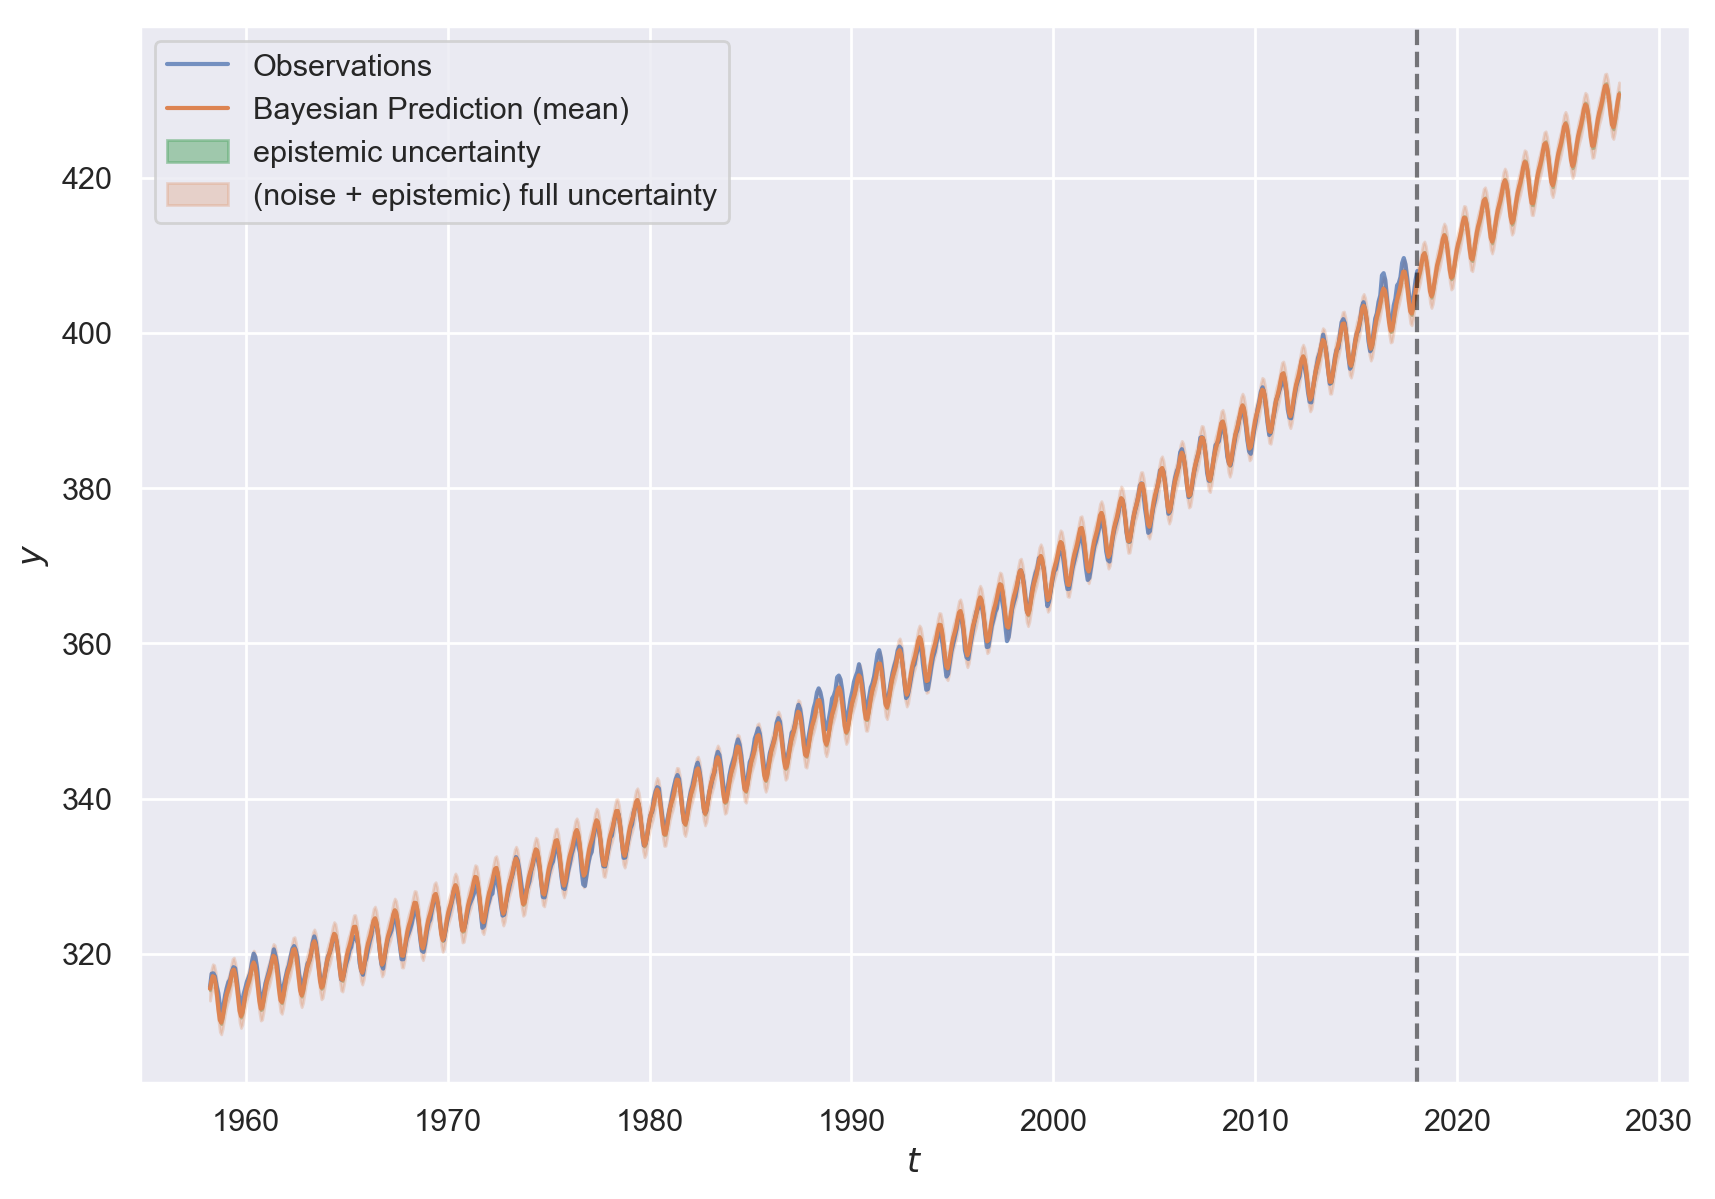

In [12]:
# Visualize Predition
fig, ax = plt.subplots(figsize=(10,7),dpi=200)
ax.plot(X_n.flatten(), Y.flatten(), alpha= 0.75, markeredgewidth=2, label='Observations')
ax.plot(X_p, Y_p, label='Bayesian Prediction (mean)')
ax.fill_between(X_p.flatten(), Y_l_ep.flatten(), Y_u_ep.flatten(), color=sns.color_palette()[2], alpha=0.5,  label = 'epistemic uncertainty')
ax.fill_between(X_p.flatten(), Y_l.flatten(), Y_l_ep.flatten(), color=sns.color_palette()[1], alpha=0.25, label = '(noise + epistemic) full uncertainty')
ax.fill_between(X_p.flatten(), Y_u_ep.flatten(), Y_u.flatten(), color=sns.color_palette()[1], alpha=0.25)
ax.axvline(x = X_n.max(), ymin=0, ymax=1, linestyle = '--', color = 'black', alpha = 0.5)
ax.set_xlabel('$t$')
ax.set_ylabel('$y$')
plt.legend(loc='upper left');

The above plot shows the Bayesian regression model mean prediction with the total and epistemic uncertainty of the evolution of the $CO_2$ levels over the time of available data as well in future from Feb 2018 to Feb 2028 (right side to dotted vertical line). As we can see that the model is able to capture the overall and seasonal variation reasonably well.

The plot below shows the zoomed in version with focus on the last 20 years from the above plot to see details of mean prediction as well as uncertainties in prediction. From this we can see that in this region, epistemic uncertainty is comparably smaller to total uncertainty with noise, and the observations mostly lies in the 95% predictive interval of the regression model. Below, we will take a more detailed look in the prediction uncertainties.

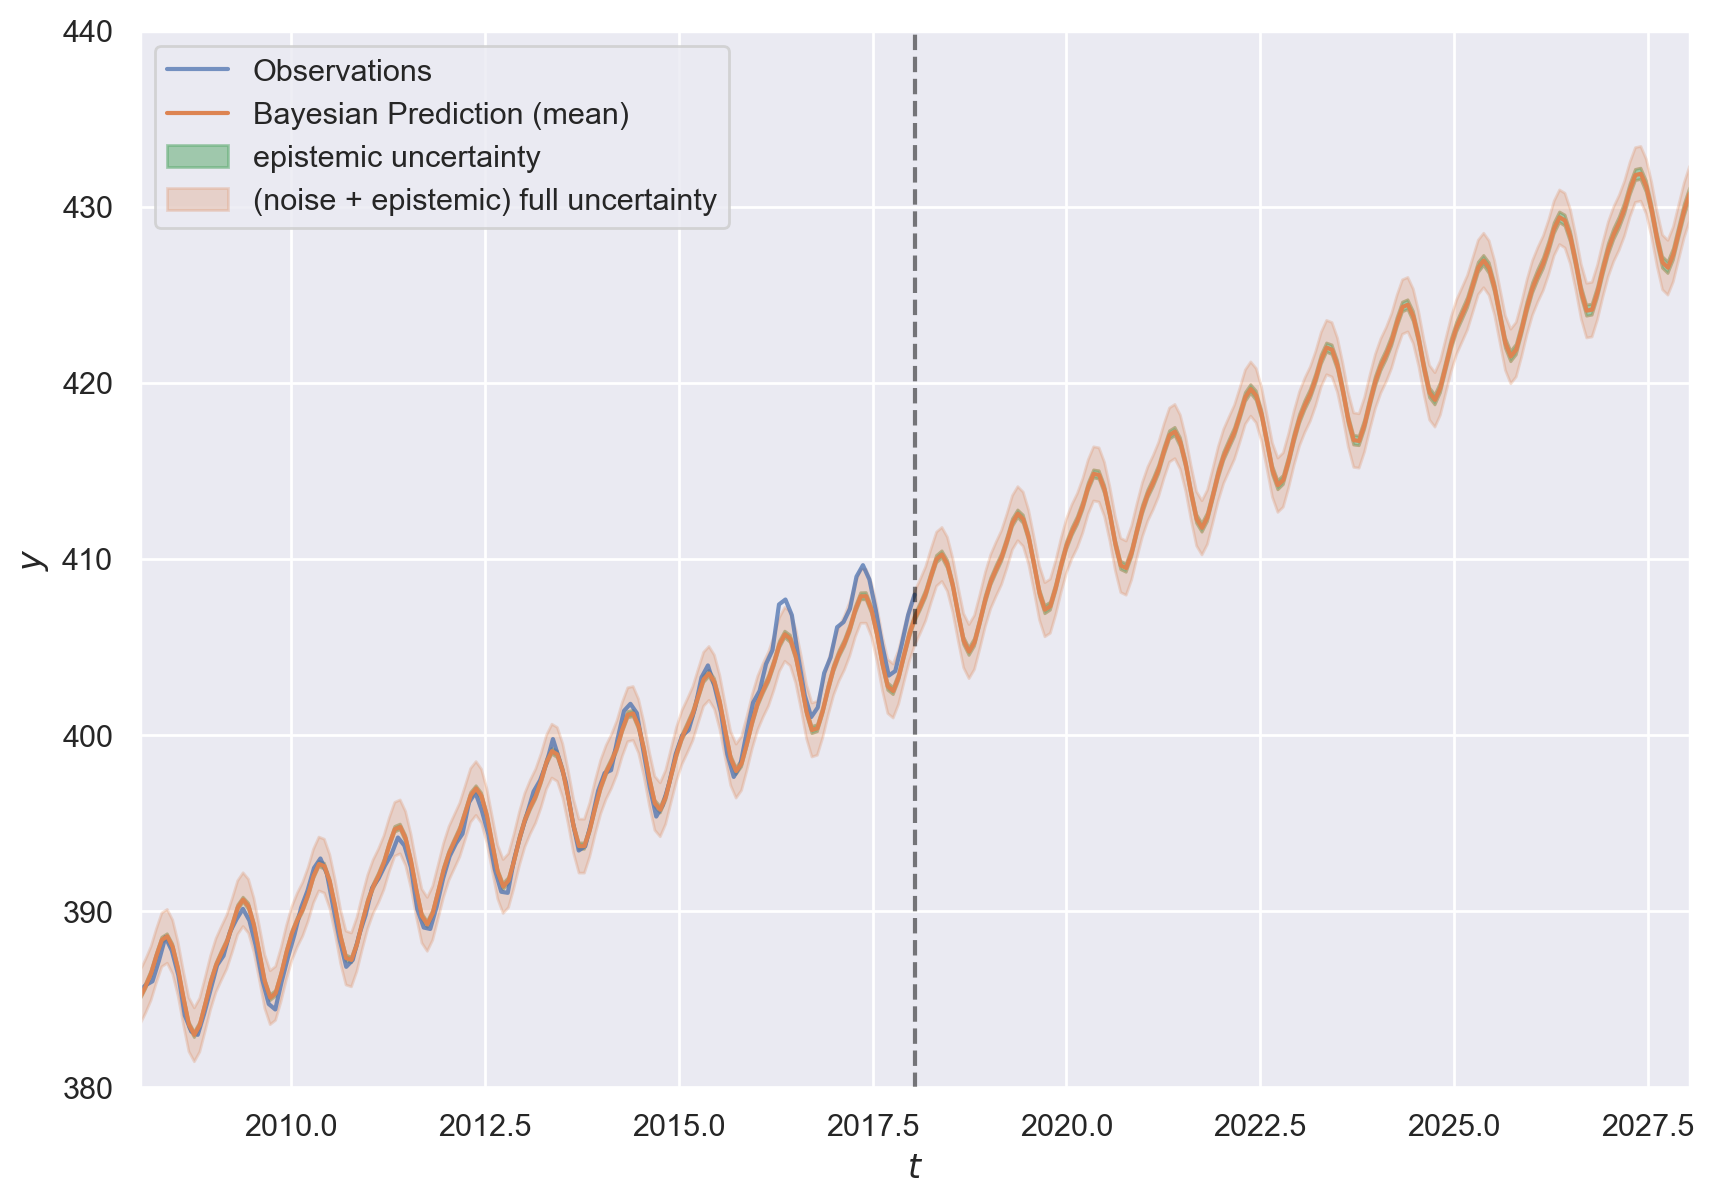

In [13]:
# Zoomed in Plot
fig, ax = plt.subplots(figsize=(10,7),dpi=200)
ax.plot(X_n.flatten(), Y.flatten(), alpha= 0.75, markeredgewidth=2, label='Observations')
ax.plot(X_p, Y_p, label='Bayesian Prediction (mean)')
ax.fill_between(X_p.flatten(), Y_l_ep.flatten(), Y_u_ep.flatten(), color=sns.color_palette()[2], alpha=0.5,  label = 'epistemic uncertainty')
ax.fill_between(X_p.flatten(), Y_l.flatten(), Y_l_ep.flatten(), color=sns.color_palette()[1], alpha=0.25, label = '(noise + epistemic) full uncertainty')
ax.fill_between(X_p.flatten(), Y_u_ep.flatten(), Y_u.flatten(), color=sns.color_palette()[1], alpha=0.25)
ax.axvline(x = X_n.max(), ymin=0, ymax=1, linestyle = '--', color = 'black', alpha = 0.5)
ax.set_xlabel('$t$')
ax.set_ylabel('$y$')
ax.set_xlim(X_p.max()-20, X_p.max())
ax.set_ylim(380,440)
plt.legend(loc='upper left');

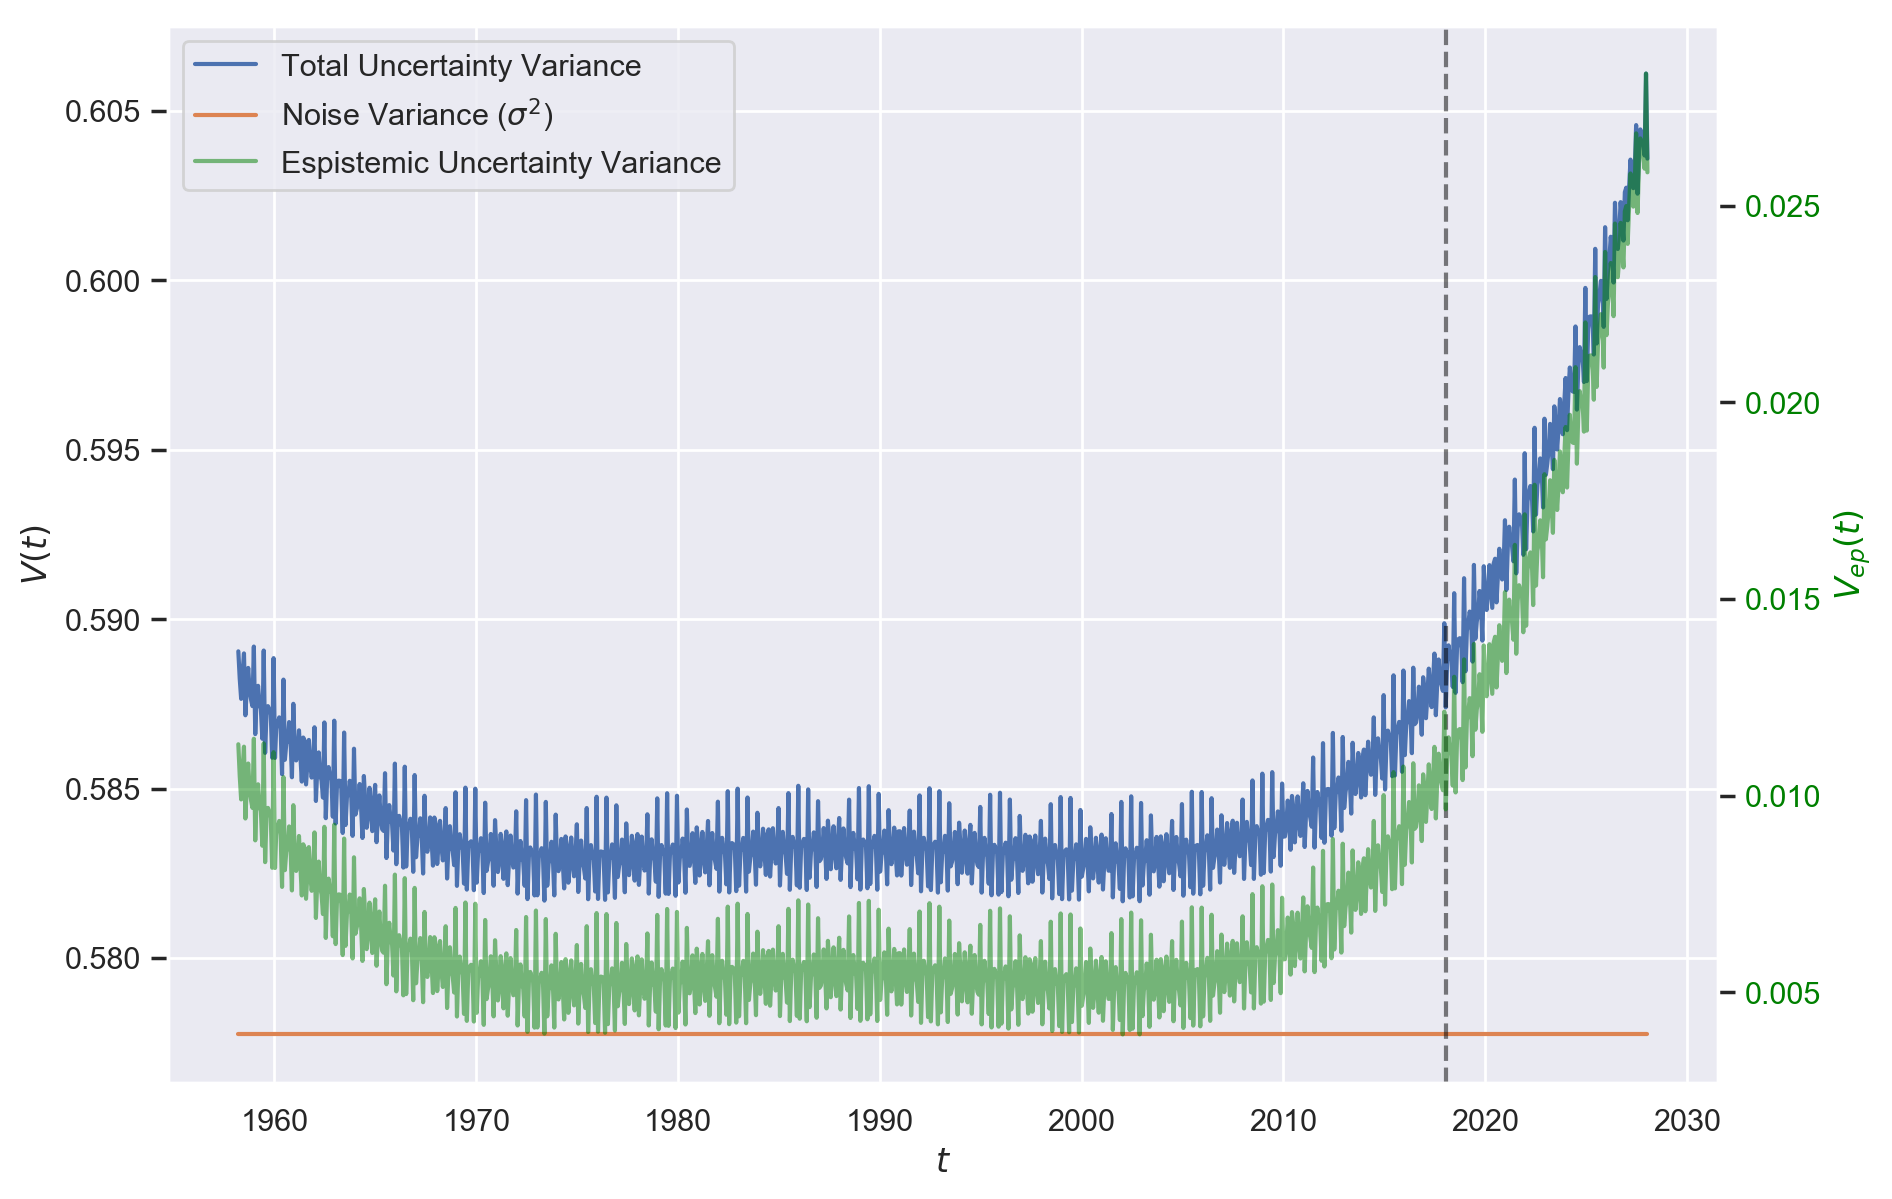

In [14]:
# Uncertainty Plot
fig, ax = plt.subplots(figsize=(10,7),dpi=200)
lns1 = ax.plot(X_p, V_p, label='Total Uncertainty Variance')
lns2 = ax.plot(X_p, V_p - V_p_ep, label='Noise Variance ($\sigma^2$)')
ax.set_ylabel('$V(t)$')
ax.set_xlabel('$t$')
# ax.legend(loc='best');
ax1 = ax.twinx()
lns3 = ax1.plot(X_p, V_p_ep, 'green', alpha=0.5, label='Espistemic Uncertainty Variance')
ax1.set_xlabel('$t$')
ax1.set_ylabel('$V_{ep}(t)$', color = 'green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.grid(None)
ax.axvline(x = X_n.max(), ymin=0, ymax=1, linestyle = '--', color = 'black', alpha = 0.5)
# Legend together
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc= 'best');

The above plot shows the Bayesian regression model predictive variance over the time of available data as well in future from Feb 2018 to Feb 2028 (right side to dotted vertical line). The total uncertainty variance and noise variance (which is constant) are shown in the left y-axis; whereas, epistemic uncertainty variance is shown on right y-axis. We can see that epistemic uncertainty variance is comparably small to noise variance. We might be able to improve the noise variance by playing around with basis function maybe including more or changing to different types.

The other thing to notice that the epistemic uncertainty variance increases steeply in future prediction time interval (right side to dotted line). Also, there is quite some fluctuations in the epistemic uncertainty on seasonal level, which maybe reduced by playing around with basis function to capture the seasonal variations better.

## Part B

In this problem you have to do exactly the same as in problem 1, but using Gaussian process regression using ``GPy``. 

Select an appropriate kernel function and justify your choice. Note that you can construct new kernels out of existing kernels by taking the sum or product of kernels. For instance, if $k_1$ and $k_2$ are valid covariance kernels, then, $k_{sum} = k_1 + k_2$ and $k_{prod} = k_1 \times k_2$ are also valid covariance kernels. 

**Solution:**

To perform the Gaussian process regression on the given data first we will choose suitable kernel which can capture the overall as well as seasonal variations in the data, similar to what we did for basis function in the above part. Kernels are chosen as follows based on data pattern and the recommendation from Rasmussen & Williams, 2006.

1. To model the overall rising trend the squared exponential kernel i.e. Radial Basis is chosen which can capture this smooth change with large enough lengthscale
$$
k_1(x,x') = p_1 \exp \left( -\frac{1}{2} \frac{(x-x')^2}{\ell_1^2} \right)
$$
2. To model the seasonal periodic variations we will choose squared exponential sine squared kernel with a period of 1 year. As the seasonal variations are not necessarily exactly periodic, we will modify this periodic kernel by multiplying it with a squared exponential (RBF) kernel which will serve as decay term to account for any change in periodic variations over time. So, we have,
$$
k_2(x,x') = p_2 \exp \left( -\frac{1}{2} \frac{(x-x')^2}{\ell_2^2} - \frac{1}{2} \frac{\sin^2(\pi(x-x'))}{\ell_3^2} \right)
$$
3. Now to model the other small and medium term irregularities in the data variations, we will use a rational quadratic kernel similar to the approach of using polynomial basis function in Bayesian regression above in Part A.
$$
k_3(x,x') = p_3 \left( 1 + \frac{(x-x')^2}{2 \ell_4^2}  \right)^{-p_4}
$$
4. Finally, to capture the correlated noise component, we will again use a squared exponential kernel. This can capture this with small lengthscale in oppose to RBF above in 1. which capture overall smooth variation with large lengthscale. On the other hand white noise component will be captured by the Gaussian noise in GP model in ``GPy``.
$$
k_4(x,x') = p_5 \exp \left( -\frac{1}{2} \frac{(x-x')^2}{\ell_5^2} \right)
$$

Now we will use the ``GPy`` to make overall kernel based on the above formulation, and perform the Gaussian Process Regression on data.

In [15]:
# Make an overall kernel from different kernels 
k1 = GPy.kern.RBF(1)
k2_p = GPy.kern.StdPeriodic(1, period=1.)
k2_se = GPy.kern.RBF(1)
k2 = GPy.kern.Prod(kernels = [k2_p, k2_se])
k3 = GPy.kern.RatQuad(1)
k4 = GPy.kern.RBF(1)

# Overall Kernel
k = GPy.kern.Add([k1, k2, k3, k4])
print(k)

  sum.                          |  value  |  constraints  |  priors
  rbf.variance                  |    1.0  |      +ve      |        
  rbf.lengthscale               |    1.0  |      +ve      |        
  mul.std_periodic.variance     |    1.0  |      +ve      |        
  mul.std_periodic.period       |    1.0  |      +ve      |        
  mul.std_periodic.lengthscale  |    1.0  |      +ve      |        
  mul.rbf.variance              |    1.0  |      +ve      |        
  mul.rbf.lengthscale           |    1.0  |      +ve      |        
  RatQuad.variance              |    1.0  |      +ve      |        
  RatQuad.lengthscale           |    1.0  |      +ve      |        
  RatQuad.power                 |    2.0  |      +ve      |        
  rbf_1.variance                |    1.0  |      +ve      |        
  rbf_1.lengthscale             |    1.0  |      +ve      |        


In [16]:
# GP Model
gp = GPy.models.GPRegression(X, Y, k)
print(gp)


Name : GP regression
Objective : 417766.46390567
Number of Parameters : 13
Number of Optimization Parameters : 13
Updates : True
Parameters:
  GP_regression.                    |  value  |  constraints  |  priors
  sum.rbf.variance                  |    1.0  |      +ve      |        
  sum.rbf.lengthscale               |    1.0  |      +ve      |        
  sum.mul.std_periodic.variance     |    1.0  |      +ve      |        
  sum.mul.std_periodic.period       |    1.0  |      +ve      |        
  sum.mul.std_periodic.lengthscale  |    1.0  |      +ve      |        
  sum.mul.rbf.variance              |    1.0  |      +ve      |        
  sum.mul.rbf.lengthscale           |    1.0  |      +ve      |        
  sum.RatQuad.variance              |    1.0  |      +ve      |        
  sum.RatQuad.lengthscale           |    1.0  |      +ve      |        
  sum.RatQuad.power                 |    2.0  |      +ve      |        
  sum.rbf_1.variance                |    1.0  |      +ve      |   

In [24]:
# Optimize GP model
_ = gp.optimize_restarts(10, robust=True)

Optimization restart 1/10, f = 217.88058955376823
Optimization restart 2/10, f = 445.9103932170227
Optimization restart 3/10, f = 995.9035026683149
Optimization restart 4/10, f = 1594.3606463027813
Optimization restart 5/10, f = 877.3626971143253
Optimization restart 6/10, f = 740.175934928617
Optimization restart 7/10, f = 250.14812321177135
Optimization restart 8/10, f = 1603.0977495377497
Warning - optimization restart 9/10 failed
Optimization restart 10/10, f = 1600.710685210815


In [25]:
print(gp)


Name : GP regression
Objective : 217.88058955376823
Number of Parameters : 13
Number of Optimization Parameters : 13
Updates : True
Parameters:
  GP_regression.                    |                   value  |  constraints  |  priors
  sum.rbf.variance                  |      0.5351257393683904  |      +ve      |        
  sum.rbf.lengthscale               |       1.090414841421673  |      +ve      |        
  sum.mul.std_periodic.variance     |      123.23759732372173  |      +ve      |        
  sum.mul.std_periodic.period       |      0.9996279116806263  |      +ve      |        
  sum.mul.std_periodic.lengthscale  |      2.3043185311748093  |      +ve      |        
  sum.mul.rbf.variance              |       133.0172003833021  |      +ve      |        
  sum.mul.rbf.lengthscale           |      143.80419470594572  |      +ve      |        
  sum.RatQuad.variance              |      285.92886154429374  |      +ve      |        
  sum.RatQuad.lengthscale           |  1.9105610425054

Above, we can see the Gaussian Process regression model optimized kernel parameters. 

In [26]:
# Predictive distribution
X_p = np.linspace(0 ,np.max(X) + 10, 1000)[:, None]
Y_p, V_p = gp.predict(X_p) # Prediction
# V_p_ep = V_p - gp.likelihood.variance # Epistemic Uncertainty
V_p_ep = V_p - gp.Gaussian_noise.variance # Epistemic Uncertainty (Same as above)
Y_l_ep = Y_p - 2.0 * np.sqrt(V_p_ep) # Lower epistemic predictive bound
Y_u_ep = Y_p + 2.0 * np.sqrt(V_p_ep) # Upper epistemic predictive bound
Y_l = Y_p - 2.0 * np.sqrt(V_p) # Lower predictive bound
Y_u = Y_p + 2.0 * np.sqrt(V_p) # Upper predictive bound

In [27]:
# Transform time back to actual start for plotting
X_n = X + t.min()
X_p = X_p + t.min()

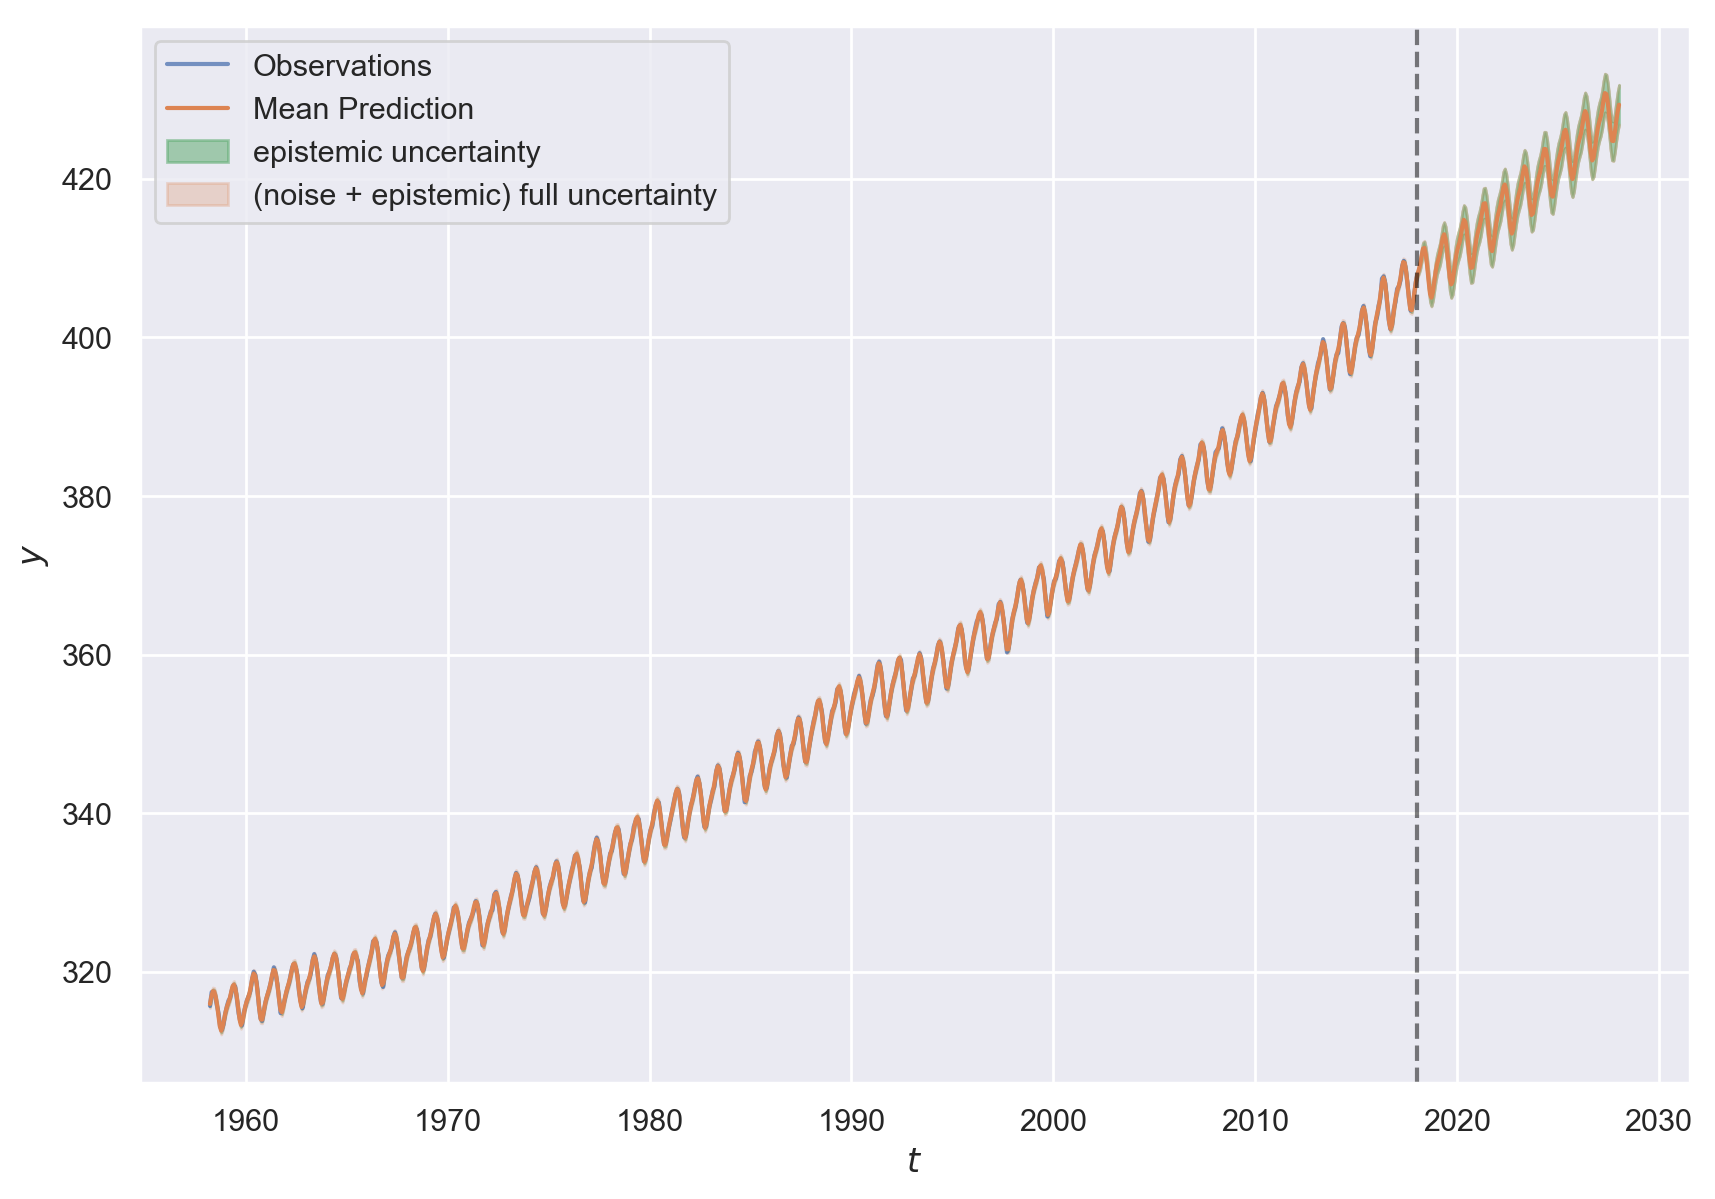

In [28]:
# Visualize Predition
fig, ax = plt.subplots(figsize=(10,7),dpi=200)
ax.plot(X_n.flatten(), Y.flatten(), alpha= 0.75, markeredgewidth=2, label='Observations')
ax.plot(X_p, Y_p, label='Mean Prediction')
ax.fill_between(X_p.flatten(), Y_l_ep.flatten(), Y_u_ep.flatten(), color=sns.color_palette()[2], alpha=0.5,  label = 'epistemic uncertainty')
ax.fill_between(X_p.flatten(), Y_l.flatten(), Y_l_ep.flatten(), color=sns.color_palette()[1], alpha=0.25, label = '(noise + epistemic) full uncertainty')
ax.fill_between(X_p.flatten(), Y_u_ep.flatten(), Y_u.flatten(), color=sns.color_palette()[1], alpha=0.25)
ax.axvline(x = X_n.max(), ymin=0, ymax=1, linestyle = '--', color = 'black', alpha = 0.5)
ax.set_xlabel('$t$')
ax.set_ylabel('$y$')
plt.legend(loc='upper left');

The above plot shows the Gaussian Process regression model mean prediction with the total and epistemic uncertainty of the evolution of the $CO_2$ levels over the time of available data as well in future from Feb 2018 to Feb 2028 (right side to dotted vertical line). As we can see that the model is able to capture the variation reasonably well and somewhat better than the Bayesian linear regression model in Part A.

The plot below shows the zoomed in version with focus on the last 20 years from the above plot to see details of mean prediction as well as uncertainties in prediction. From this and above plot, we can see that in the observations region, epistemic uncertainty is very small; whereas, in the future prediction region epistemic uncertainty 95% bounds increases or widens with the time. The other thing to notice is that in total uncertainty, epistemic uncertainty is main component with negligible noise component.

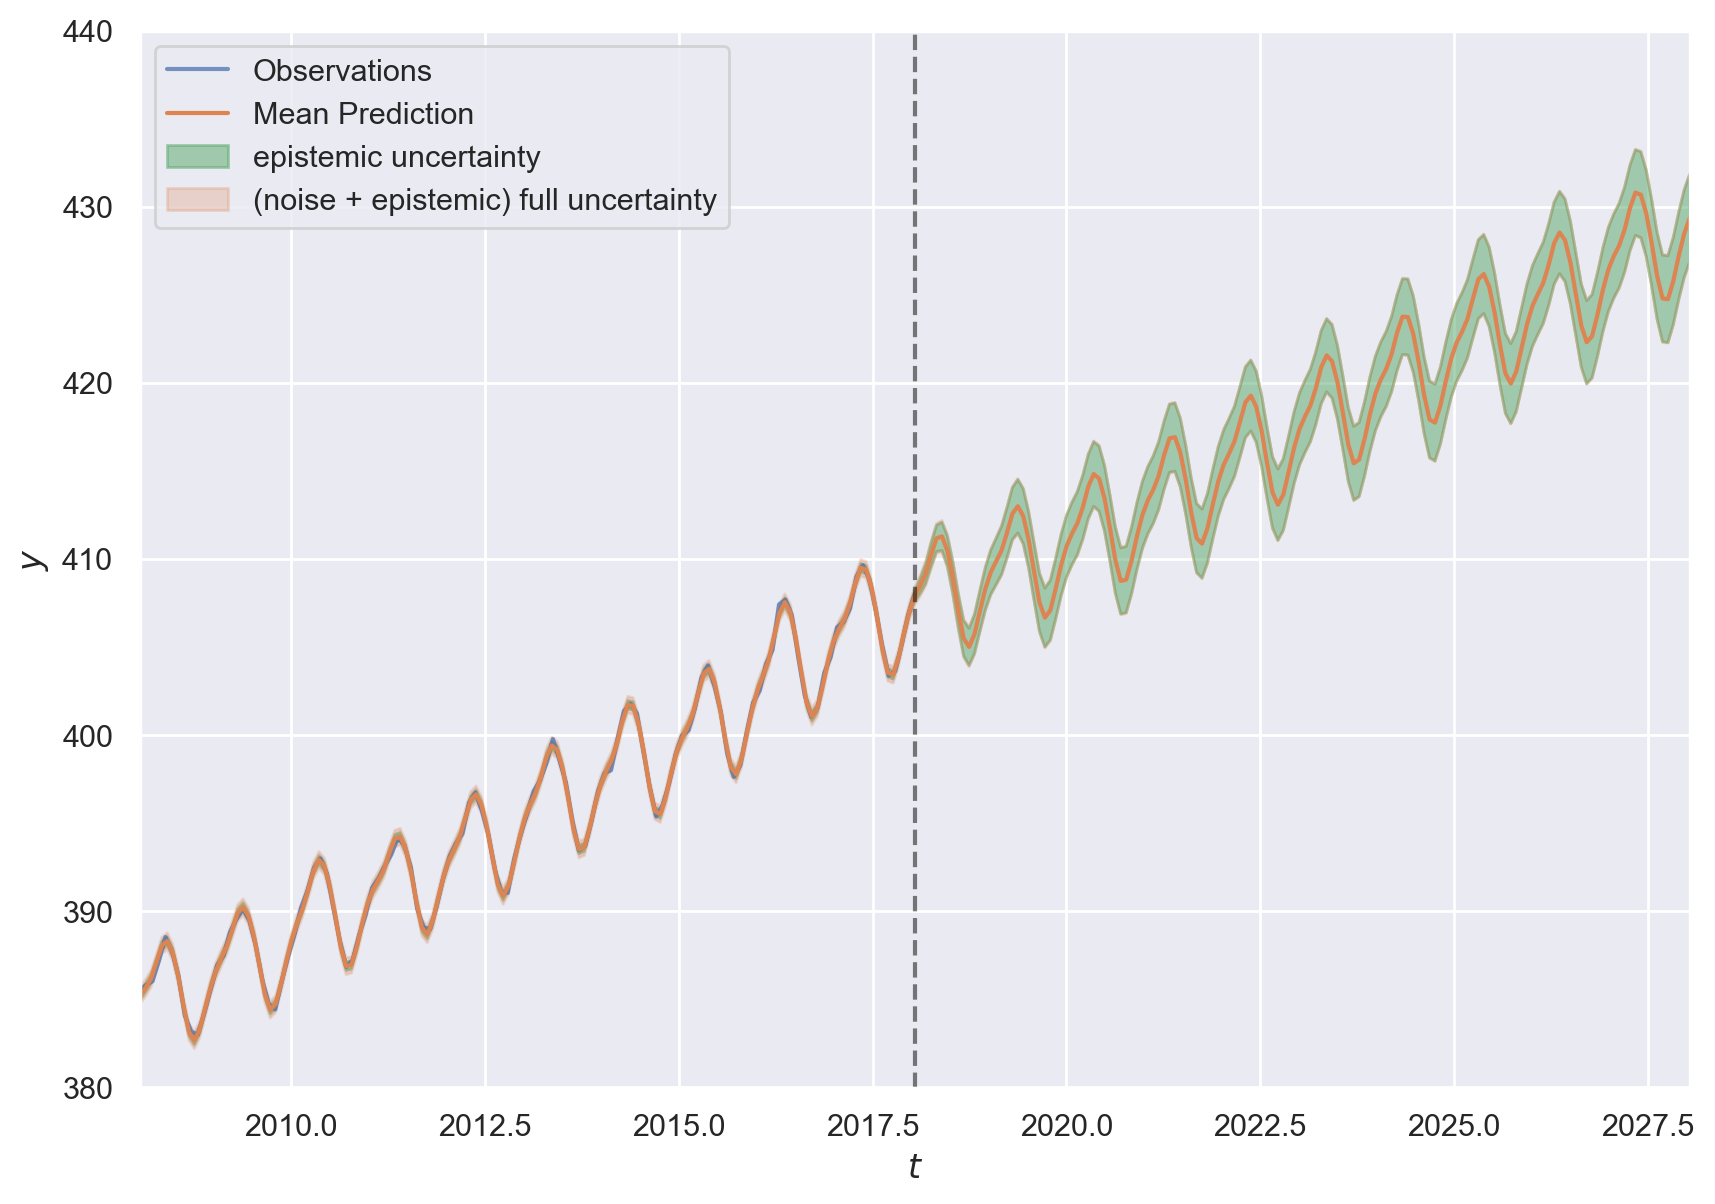

In [29]:
# Zoomed in Plot
fig, ax = plt.subplots(figsize=(10,7),dpi=200)
ax.plot(X_n.flatten(), Y.flatten(), alpha=  0.75, markeredgewidth=2, label='Observations')
ax.plot(X_p, Y_p, label='Mean Prediction')
ax.fill_between(X_p.flatten(), Y_l_ep.flatten(), Y_u_ep.flatten(), color=sns.color_palette()[2], alpha=0.5,  label = 'epistemic uncertainty')
ax.fill_between(X_p.flatten(), Y_l.flatten(), Y_l_ep.flatten(), color=sns.color_palette()[1], alpha=0.25, label = '(noise + epistemic) full uncertainty')
ax.fill_between(X_p.flatten(), Y_u_ep.flatten(), Y_u.flatten(), color=sns.color_palette()[1], alpha=0.25)
ax.axvline(x = X_n.max(), ymin=0, ymax=1, linestyle = '--', color = 'black', alpha = 0.5)
ax.set_xlabel('$t$')
ax.set_ylabel('$y$')
ax.set_xlim(X_p.max()-20, X_p.max())
ax.set_ylim(380,440)
plt.legend(loc='upper left');

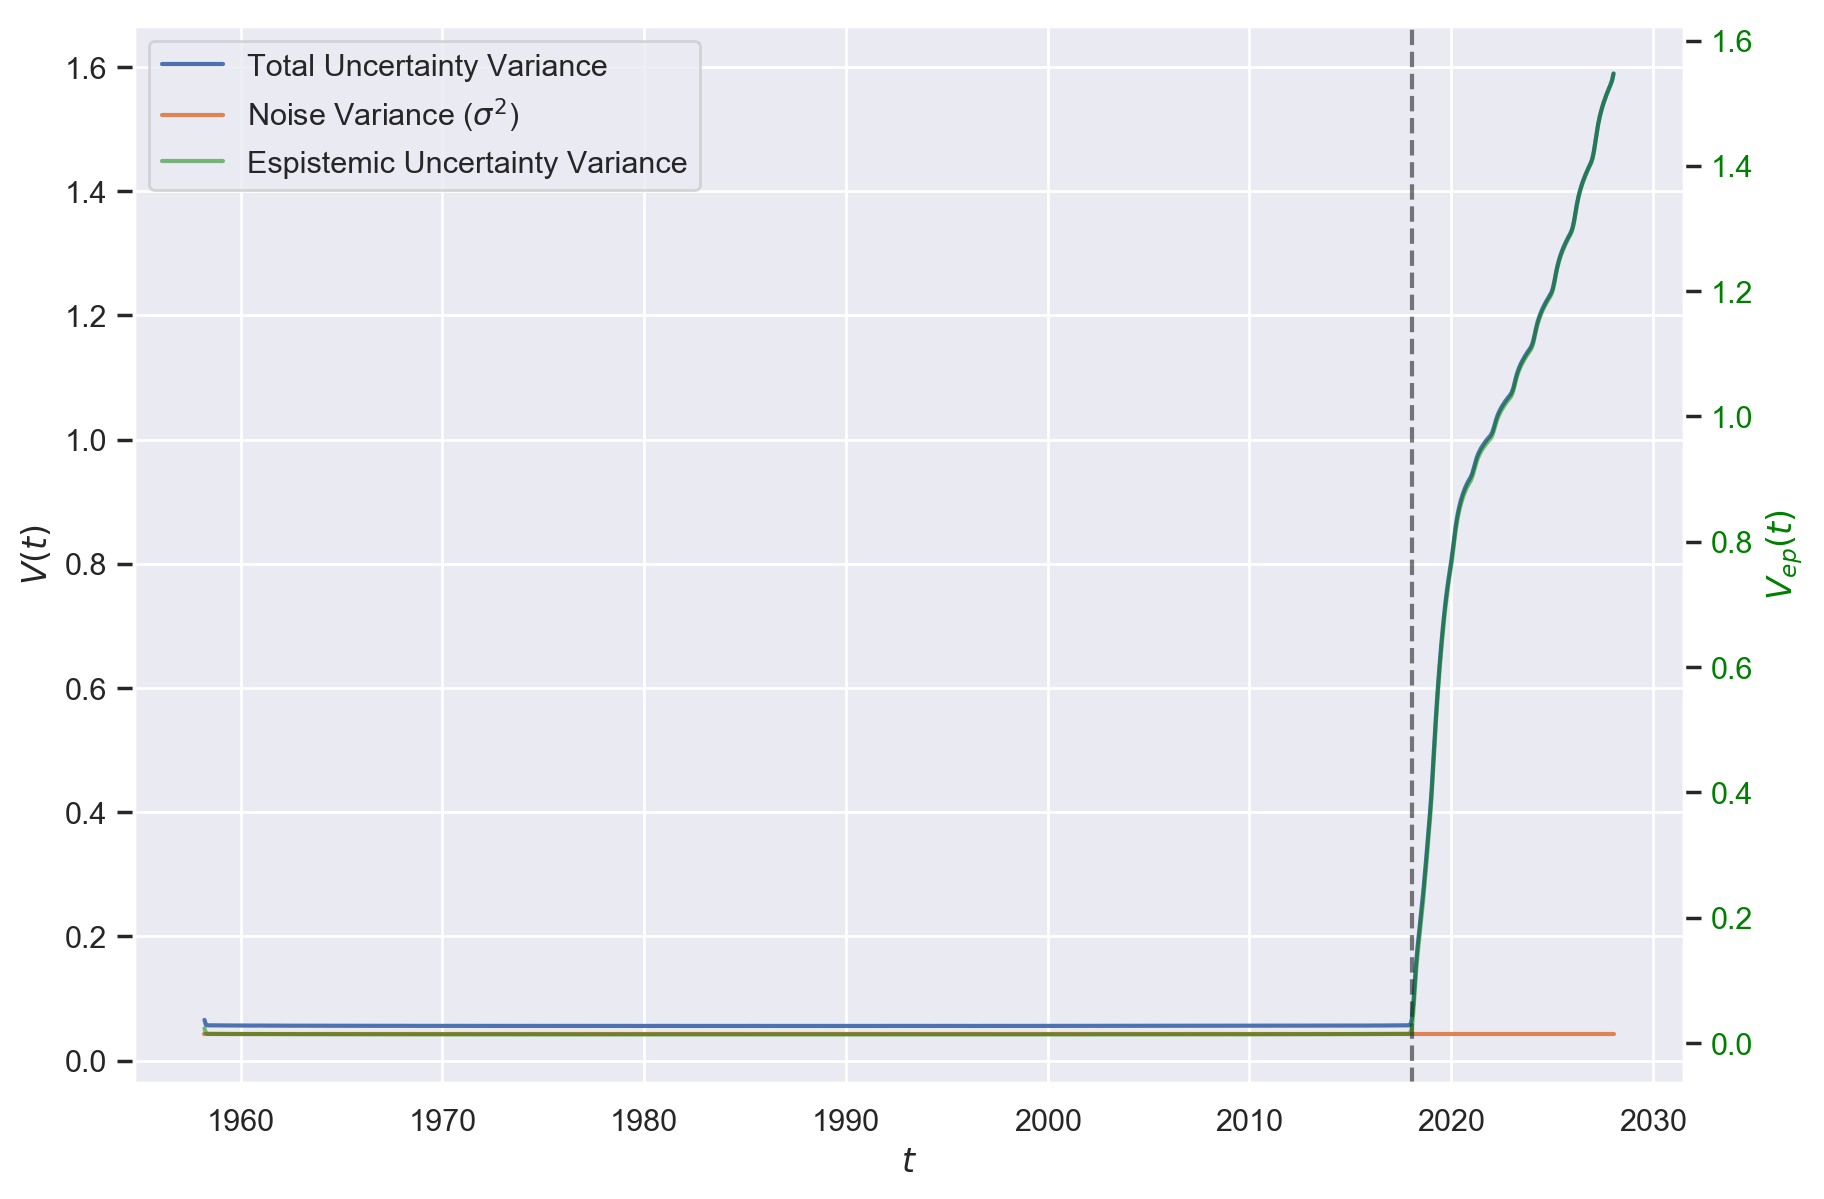

In [30]:
# Uncertainty Plot
fig, ax = plt.subplots(figsize=(10,7),dpi=200)
lns1 = ax.plot(X_p, V_p, label='Total Uncertainty Variance')
lns2 = ax.plot(X_p, V_p - V_p_ep, label='Noise Variance ($\sigma^2$)')
ax.set_ylabel('$V(t)$')
ax.set_xlabel('$t$')
# ax.legend(loc='best');
ax1 = ax.twinx()
lns3 = ax1.plot(X_p, V_p_ep, 'green', alpha=0.5, label='Espistemic Uncertainty Variance')
ax1.set_xlabel('$t$')
ax1.set_ylabel('$V_{ep}(t)$', color = 'green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.grid(None)
ax.axvline(x = X_n.max(), ymin=0, ymax=1, linestyle = '--', color = 'black', alpha = 0.5)
# Legend together
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc= 'best');

The above plot shows the Gaussian Process regression model predictive variance over the time of available data as well in future from Feb 2018 to Feb 2028 (right side to dotted vertical line). The total uncertainty variance and noise variance (which is constant) are shown in the left y-axis; whereas, epistemic uncertainty variance is shown on right y-axis. As stated before, we can see that the noise is almost negligible and total uncertainty has epistemic uncertainty as primary component which can be confirmed with overlapping line of total and epistemic uncertainty variance in the above plot.

The other thing to notice is that the epistemic uncertainty variance increases steeply in future prediction time interval (right side to dotted line). Also, in the observation data region, epistemic uncertainty is almost constant.

# Problem 3 - Stochastic model for permeability of oil reservoir

In [31]:
class KarhunenLoeveExpansion(object):
    
    """
    A class representing the Karhunen Loeve Expansion of a Gaussian random field.
    It uses the Nystrom approximation to do it.
    
    Arguments:
        k      -     The covariance function.
        Xq     -     Quadrature points for the Nystrom approximation.
        wq     -     Quadrature weights for the Nystrom approximation.
        alpha  -     The percentage of the energy of the field that you want to keep.
        X      -     Observed inputs (optional).
        Y      -     Observed field values (optional).
    """
    
    def __init__(self, k, Xq=None, wq=None, nq=100, alpha=0.9, X=None, Y=None):
        self.k = k
        if Xq is None:
            if k.input_dim == 1:
                Xq = np.linspace(0, 1, nq)[:, None]
                wq = np.ones((nq, )) / nq
            elif k.input_dim == 2:
                nq = int(np.sqrt(nq))
                x = np.linspace(0, 1, nq)
                X1, X2 = np.meshgrid(x, x)
                Xq = np.hstack([X1.flatten()[:, None], X2.flatten()[:, None]])
                wq = np.ones((nq ** 2, )) / nq ** 2
            else:
                raise NotImplementedError('For more than 2D, please supply quadrature points and weights.')
        self.Xq = Xq
        self.wq = wq
        self.k = k
        self.alpha = alpha
        self.X = X
        self.Y = Y
        # If we have some observed data, we need to use the posterior covariance
        if X is not None:
            gpr = GPy.models.GPRegression(X, Y[:, None], k)
            gpr.likelihood.variance = 1e-12
            self.gpr = gpr
            Kq = gpr.predict(Xq, full_cov=True)[1]
        else:
            Kq = k.K(Xq)
        B = np.einsum('ij,j->ij', Kq, wq)
        lam, v = scipy.linalg.eigh(B, overwrite_a=True)
        lam = lam[::-1]
        lam[lam <= 0.] = 0.
        energy = np.cumsum(lam) / np.sum(lam)
        i_end = np.arange(energy.shape[0])[energy > alpha][0] + 1
        lam = lam[:i_end]
        v = v[:, ::-1]
        v = v[:, :i_end]
        self.lam = lam
        self.sqrt_lam = np.sqrt(lam)
        self.v = v
        self.energy = energy
        self.num_xi = i_end
        
    def eval_phi(self, x):
        """
        Evaluate the eigenfunctions at x.
        """
        if self.X is not None:
            nq = self.Xq.shape[0]
            Xf = np.vstack([self.Xq, x])
            m, C = self.gpr.predict(Xf, full_cov=True)
            Kc = C[:nq, nq:].T
            self.tmp_mu = m[nq:, :].flatten()
        else:
            Kc = self.k.K(x, self.Xq)
            self.tmp_mu = 0.
        phi = np.einsum("i,ji,j,rj->ri", 1. / self.lam, self.v, self.wq**0.5, Kc)
        return phi
    
    def __call__(self, x, xi):
        """
        Evaluate the expansion at x and xi.
        """
        phi = self.eval_phi(x)
        return self.tmp_mu + np.dot(phi, xi * self.sqrt_lam)

The permeability of the soil is one of the largest unknowns in modeling underground flows. Here, you will create a 2D model of permeability that can be used for propagating uncertainties or as a starting point for model calibration. This is the information that is available to you:
+ You need to build a stochastic model for permeability with as low dimensionality as possible.
+ You need to be able to sample random permeability fields from this model.
+ The permeability is strictly positive.
+ The 2D domain you should consider is $[0, 356]\times[0,670]$ (in meters).
+ Our geologist gave us her best estimate about the permeability field. We have put the results for you in a data file and we show you how to load it and plot it below.
+ When asked how sure she is about the prediction, the geologist gave a standard deviation of about 3.2 on the logarithm of the permeability.
+ She also believes that there are two lengthscales: 50 meters and 10 meters.

Answer the following questions.

## Part A 

Write down the mathematical form of the best stochastic model for the permeability you can come up with using the information above. Are you going to use a GP? Are you going to consider a transformed version of the GP? What would the mean be? What would the covariance function be? What would the parameters of the covariance function be?

**Solution:**

<br><br><br><br><br>

## Part B 

Construct the Karhunen-Loeve expansion of the field using the code provided above. You should: 1) use enough quadrature points so that you get a converged Nystrom approximation; 2) use enough terms to cover $95\%$ of the fields energy; 3) Plot the egenvalues of KLE; 4) Plot the first six eigenfunctions of KLE; 5) Plot six samples of the random field.

Here is the mean field provided by the geologist:

Text(0.5, 1.0, 'Mean of the log permeability')

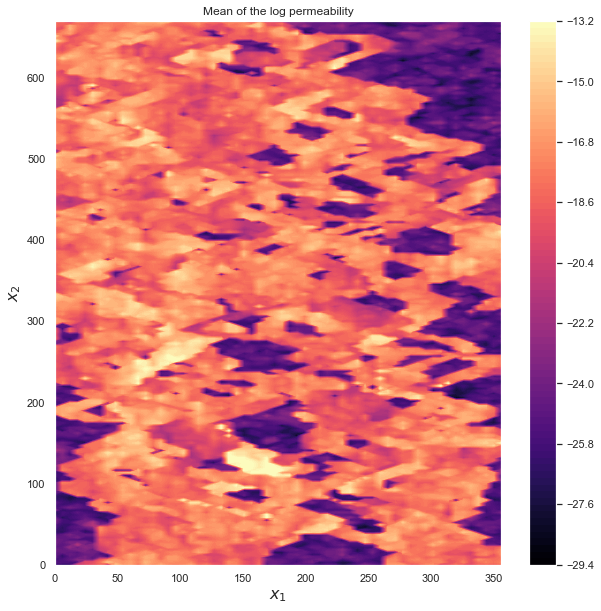

In [32]:
# download the data 
spe10_data_url = 'https://raw.githubusercontent.com/PredictiveScienceLab/uq-course/master/homeworks/spe10_permx.dat'
spe10_fname = "spe10_permx.dat"
if not os.path.exists(spe10_fname):
    wget.download(spe10_data_url, spe10_fname)
M = np.loadtxt(spe10_fname,dtype=np.float64).T

# visualize the mean field 
x1 = np.linspace(0, 356, 60)
x2 = np.linspace(0, 670, 220)
X1, X2 = np.meshgrid(x1, x2)
fig, ax = plt.subplots(1, figsize = (10, 10))
im=ax.contourf(X1, X2, np.log(M), 100, cmap = 'magma')
fig.colorbar(im, ax=ax)
ax.set_xlabel('$x_1$', fontsize = 16)
ax.set_ylabel('$x_2$', fontsize = 16)
ax.set_title('Mean of the log permeability')

**Solution:**

<br><br><br><br><br>

## Part C

You sent a crew to go and make some measurements of the permeability. Repeate everything you did in b. making use of the new data:
 

|$x_1$ |$x_2$ | $\log K(x_1, x_2)$ |
|------|------|--------------------|
|100.  |200.  | -13.2              |
|300.  |500.  | -25.3              |


**Solution**
<br><br><br><br><br>